In [1]:
import numpy as np
import simpy
import copy
import matplotlib.pyplot as plt

First come First Serve model

Simulation by Da Qing

### Machines and Products

In [2]:
#Assign different seeds to this model here
np.random.seed(5)
#np.random.seed(3)
#np.random.seed(22)

In [3]:
#randomly generate the total number of machines
N_match=np.random.randint(15,25)
#randomly generate the total number of machines
print("There are ",N_match,"types of machines")

There are  18 types of machines


In [4]:
env = simpy.Environment()
env1 = simpy.Environment()

In [5]:
N_type=np.random.randint(15,25)
#randomly generate the total number of types of products
print("There are",N_type,"types of products")

There are 21 types of products


In [6]:
#Label machines's types from 0 to N_match
m = []
for i in range(0,N_match):
    m.append(i)

In [7]:
m

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [8]:
#Randomly generate the amount of steps that each type of product needs
steps = []
for i in range(N_type):
    steps.append(np.random.randint(5,10))
    #Each type of product needs 5-9 machines(steps) to generate.
print("The number of machines that each type of product needs is")
print(steps)

The number of machines that each type of product needs is
[5, 6, 5, 9, 8, 5, 5, 9, 6, 5, 8, 9, 8, 6, 9, 7, 6, 6, 7, 6, 6]


In [9]:
total_step=0
for i in range (len(steps)):
    total_step=total_step+steps[i]
print ("the average length of production sequence is",total_step/len(steps))

the average length of production sequence is 6.714285714285714


In [10]:
#Two dimentional list
p_step = [[0 for i in range(max(steps))]for j in range(N_type)]

for i in range(N_type):
    step = steps[i]
    m_copy = copy.copy(m)

    for j in range(step):
        length = len(m_copy)
        randomnum = np.random.randint(0,length)       
        p_step[i][j] = m_copy[randomnum]
        m_copy.pop(randomnum)
        
    p_step[i] = p_step[i][0:step]
print("Production Procedure Sequence: (The machines that each type of products need to go through is")    
print(p_step)
# p_step indicates the production procedure that each type of products goes through.
# for example，if p_step[0]=[9,17,10,14,16], it means that Product No.0 need to go through
# Machine No.9, Machine No.17, Machine No.10, Machine No.14, Machine No.16, before it's been finished.

Production Procedure Sequence: (The machines that each type of products need to go through is
[[1, 8, 0, 17, 7], [0, 17, 5, 16, 6, 12], [2, 5, 8, 12, 4], [17, 7, 4, 14, 16, 13, 15, 3, 1], [3, 15, 12, 16, 1, 11, 7, 10], [16, 14, 10, 9, 6], [15, 17, 5, 2, 16], [13, 11, 8, 0, 16, 17, 6, 3, 1], [7, 8, 6, 14, 0, 1], [8, 13, 16, 5, 14], [5, 10, 7, 4, 8, 2, 17, 14], [1, 16, 7, 4, 6, 2, 13, 0, 8], [13, 16, 2, 5, 1, 9, 15, 6], [11, 4, 2, 5, 7, 14], [0, 11, 17, 14, 7, 8, 13, 3, 16], [0, 9, 10, 14, 12, 8, 5], [8, 11, 6, 15, 10, 0], [15, 14, 5, 3, 13, 16], [4, 0, 3, 5, 2, 16, 6], [13, 1, 8, 3, 9, 5], [0, 14, 10, 2, 12, 1]]


### Input Sequences

In [11]:
S_p=[] #input sequences
N_s=np.random.randint(1,11) # N_s is the total number of input sequences
print("The total number of input sequences is",N_s)

The total number of input sequences is 9


In [12]:
for i in range(N_s):
    S_p.append(np.random.randint(50,300))
    #Each sequence has 50-300 products
print("The number of products in each sequence is",S_p)

The number of products in each sequence is [201, 217, 171, 246, 289, 259, 141, 86, 164]


In [13]:
S=[] #S is the input production sequences
for i in range(0,N_s):
    S.append([np.random.randint(0,N_type)])
    for j in range(0,S_p[i]):
        S[i].append(np.random.randint(0,N_type))
    print("The input production sequences for Sequence[{}] are:".format(i))
    print("S[{}]=".format(i), S[i])

The input production sequences for Sequence[0] are:
S[0]= [1, 5, 4, 18, 2, 13, 1, 18, 3, 1, 18, 20, 9, 0, 17, 2, 14, 19, 8, 10, 5, 15, 20, 19, 14, 5, 17, 17, 0, 8, 14, 0, 13, 5, 9, 19, 11, 3, 16, 19, 3, 3, 2, 6, 18, 15, 7, 0, 3, 5, 1, 6, 7, 3, 14, 9, 7, 7, 6, 14, 4, 10, 10, 4, 0, 16, 17, 5, 3, 15, 17, 16, 11, 8, 19, 20, 20, 10, 9, 14, 7, 9, 16, 12, 15, 7, 15, 13, 17, 3, 14, 19, 13, 19, 19, 17, 16, 0, 18, 14, 14, 2, 8, 17, 8, 10, 6, 9, 1, 18, 20, 14, 5, 12, 17, 13, 15, 6, 12, 1, 5, 17, 11, 13, 19, 19, 10, 16, 11, 8, 10, 7, 3, 12, 4, 0, 13, 12, 13, 19, 10, 1, 5, 1, 0, 19, 12, 4, 0, 8, 19, 5, 18, 12, 13, 6, 13, 14, 2, 12, 6, 15, 5, 17, 13, 15, 16, 18, 7, 5, 14, 18, 4, 4, 3, 9, 15, 0, 8, 10, 17, 0, 4, 14, 5, 13, 19, 9, 9, 5, 13, 20, 1, 18, 0, 3, 14, 13, 6, 13, 20, 3]
The input production sequences for Sequence[1] are:
S[1]= [3, 7, 19, 11, 1, 8, 15, 13, 14, 18, 12, 2, 2, 2, 20, 20, 13, 1, 0, 1, 6, 14, 17, 0, 17, 5, 6, 9, 12, 15, 16, 6, 15, 17, 6, 11, 4, 13, 17, 16, 6, 20, 9, 18, 6, 13, 13, 

In [14]:
M_gothrough=[]
for i in range(0,N_match):
    M_gothrough.append(0)
for i in range(0,len(S[0])):
    for j in range(0,len(p_step[S[0][i]])):
        M_gothrough[p_step[S[0][i]][j]]=M_gothrough[p_step[S[0][i]][j]]+1
print("How many times that products go through each type of machine")
print(M_gothrough)

How many times that products go through each type of machine
[88, 81, 66, 78, 55, 108, 68, 82, 99, 45, 54, 52, 38, 81, 109, 55, 116, 72]


### Cost

In [15]:
#Running cost
#C_run represents the running cost per second of each machine when this machine is working
C_run = np.random.randint(1,3)
print("The running cost per second of each machine is",C_run)

The running cost per second of each machine is 2


In [16]:
#Renting cost
#C_rent represents the rent cost per second of the n-th machine.
C_rent = []
for i in range(0,N_match):
    C_rent.append(np.random.randint(1,3))
print("The renting cost per second of the n-th machine is")
print(C_rent)

The renting cost per second of the n-th machine is
[2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1]


In [17]:
#Raw material cost
#C_material represents the raw material cost of the n-th product
C_material=[]
for i in range (0,N_type):
    C_material.append(np.random.randint(300,500))
print("The raw material cost per second of the n-th product is")
print(C_material)

The raw material cost per second of the n-th product is
[499, 462, 488, 457, 407, 462, 344, 409, 475, 313, 323, 316, 465, 417, 441, 480, 394, 325, 462, 390, 366]


In [18]:
#Human repair cost
#C_man represents having the repair team all the time ready to repair machines
C_man = np.random.randint(8,12)  
print("The human repair cost per second is",C_man)

The human repair cost per second is 10


### Time

In [19]:
#Trep represents the time taken to repair a machine
Trep = []
for i in range(0,N_match):
    Trep.append(np.random.randint(50,100))
print("The time of repairment for the n-th machine is")
print(Trep)

The time of repairment for the n-th machine is
[93, 58, 80, 93, 53, 51, 94, 94, 82, 97, 93, 95, 55, 92, 56, 69, 94, 70]


In [20]:
#The processing time
#Tpro_n represents the time that the n-th machine spend on one product.
Tpro = []
for i in range(0,N_match):
    Tpro.append(np.random.randint(10,40))
print("The time that the n-th machine spend on one product is")
print(Tpro)

The time that the n-th machine spend on one product is
[27, 20, 30, 13, 28, 13, 38, 19, 28, 32, 25, 35, 34, 23, 25, 16, 10, 33]


In [21]:
T_gothrough=[]
for i in range(0,N_match):
    T_gothrough.append(M_gothrough[i]*Tpro[i])
print("Total processing time for each type of machine")
print(T_gothrough)

Total processing time for each type of machine
[2376, 1620, 1980, 1014, 1540, 1404, 2584, 1558, 2772, 1440, 1350, 1820, 1292, 1863, 2725, 880, 1160, 2376]


In [22]:
min_T_gothrough=T_gothrough[0]
for i in range (len(T_gothrough)):
    if (min_T_gothrough>T_gothrough[i]):
        min_T_gothrough=T_gothrough[i]
min_T_gothrough

880

In [23]:
N_machines=[]
for i in range(0,N_match):
    N_machines.append(round(T_gothrough[i]/min_T_gothrough))
print("The number of machines for each type of machine is")
print(N_machines)

The number of machines for each type of machine is
[3, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 1, 2, 3, 1, 1, 3]


In [24]:
N_machine=0
for i in range(0,N_match):
    N_machine=N_machine+N_machines[i]
print("The total machine number is",N_machine)

The total machine number is 37


In [25]:
#set each type of machines as Resources, capacity of Resources = number of machines in this type
res=[]
for i in range(0,N_match):
    res.append(simpy.Resource(env, capacity=N_machines[i]))

In [26]:
res

In [27]:
#Tbk_n represents the non-failure running time (aka downtime) of the n-th machine when we randomly generate the breakdown time. 
Tbk = []
for i in range(0,N_match):
    Tbk.append(np.random.randint(200,500))
print("The non-failure running time (aka downtime) of the n-th machine is")
print(Tbk)

The non-failure running time (aka downtime) of the n-th machine is
[353, 365, 320, 436, 346, 290, 316, 239, 288, 256, 372, 461, 426, 319, 307, 442, 419, 468]


In [28]:
#Even for the same type of machines, the downtime between every single machine is different
Tbk1=[]
for i in range(0,N_match):
    Tbk1.append([Tbk[i]-np.random.randint(30,60)])
    for j in range(0,N_machines[i]-1):
        Tbk1[i].append(Tbk[i]+np.random.randint(30,60))

In [29]:
print("The non-failure running time (aka downtime) of each machine is")
print(Tbk1)

The non-failure running time (aka downtime) of each machine is
[[307, 408, 412], [329, 419], [287, 374], [381], [299, 393], [257, 340], [260, 353, 368], [201, 285], [248, 324, 343], [206, 310], [330, 408], [423, 516], [376], [262, 350], [274, 363, 352], [411], [385], [413, 509, 499]]


### observe parameters

In [30]:
global block1
block1=0 #block1 is used to track the total amount of products that have been blocked by other products by a certain time

In [31]:
global block2
block2=0 #block2 is used to track the total amount of products that have been blocked by the broken machines by a certain time

In [32]:
global block3
block3=0 #block3 is used to track how many products are blocked by other products at a certain time

In [33]:
global block4
block4=0 #block4 is used to track how many products are blocked by the broken machines at a certain time

In [34]:
#list M_state[i][j]: M_state[i]=0 means the machine(s) of type No.i is vacant, 
#M_state[i]=1 means the machine(s) of type No.i is occupied, 
#M_state[i]=2 means the machine(s) of type No.i is broken down.
M_state=[]
for i in range(0,N_match):
    M_state.append(0)

In [35]:
M_state

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
#block_time is used to track block time
global block_time
block_time=0

In [37]:
global M_vacant
M_vacant=N_machine  #the number of machines that are vacant

In [38]:
T_repair_finish=[] #T_repair_finish is used to store the time when repariment finishes for each machine
for i in range(0,N_match):
    T_repair_finish.append(0)

In [39]:
T_repair_finish

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
global M_occupied
M_occupied=0 #the number of machines that are occupied

In [41]:
global M_broken
M_broken=0 #the number of machines that are broken

In [42]:
global t_block
t_block=0

In [43]:
cost=0#cost is used to track the total cost during the whole operation
obs_time=[]
obs_cost=[]
obs_M_broken=[]#track the total number of machines that are broken at a certain time
obs_P_block=[]#track how many products are blocked(waiting) at a certain time 

In [44]:
# How much percentage of products skips machines
P_skip=[0,0,0,0,0,0,0,0,0]

### laxity factor

In [45]:
wait=[] #wait list for each type of machine
for i in range(0,N_match):
    wait.append([])
wait

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [46]:
global skip
skip=0 #the number of skipping

In [47]:
threshold=10

In [48]:
wait_N=[]
for i in range(0,N_match):
    wait_N.append(0)
wait_N

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [49]:
S_sequence=[]
for i in range(0,len(S[0])):
    S_sequence.append(copy.deepcopy(p_step[S[0][i]]))
S_sequence

[[0, 17, 5, 16, 6, 12],
 [16, 14, 10, 9, 6],
 [3, 15, 12, 16, 1, 11, 7, 10],
 [4, 0, 3, 5, 2, 16, 6],
 [2, 5, 8, 12, 4],
 [11, 4, 2, 5, 7, 14],
 [0, 17, 5, 16, 6, 12],
 [4, 0, 3, 5, 2, 16, 6],
 [17, 7, 4, 14, 16, 13, 15, 3, 1],
 [0, 17, 5, 16, 6, 12],
 [4, 0, 3, 5, 2, 16, 6],
 [0, 14, 10, 2, 12, 1],
 [8, 13, 16, 5, 14],
 [1, 8, 0, 17, 7],
 [15, 14, 5, 3, 13, 16],
 [2, 5, 8, 12, 4],
 [0, 11, 17, 14, 7, 8, 13, 3, 16],
 [13, 1, 8, 3, 9, 5],
 [7, 8, 6, 14, 0, 1],
 [5, 10, 7, 4, 8, 2, 17, 14],
 [16, 14, 10, 9, 6],
 [0, 9, 10, 14, 12, 8, 5],
 [0, 14, 10, 2, 12, 1],
 [13, 1, 8, 3, 9, 5],
 [0, 11, 17, 14, 7, 8, 13, 3, 16],
 [16, 14, 10, 9, 6],
 [15, 14, 5, 3, 13, 16],
 [15, 14, 5, 3, 13, 16],
 [1, 8, 0, 17, 7],
 [7, 8, 6, 14, 0, 1],
 [0, 11, 17, 14, 7, 8, 13, 3, 16],
 [1, 8, 0, 17, 7],
 [11, 4, 2, 5, 7, 14],
 [16, 14, 10, 9, 6],
 [8, 13, 16, 5, 14],
 [13, 1, 8, 3, 9, 5],
 [1, 16, 7, 4, 6, 2, 13, 0, 8],
 [17, 7, 4, 14, 16, 13, 15, 3, 1],
 [8, 11, 6, 15, 10, 0],
 [13, 1, 8, 3, 9, 5],
 [17, 7, 4,

### Simulation

In [50]:
def Process2(p_number,i,res,env):
    global block1
    global block2
    global block3
    global block4    
    global block_time
    global M_vacant
    global M_occupied
    global M_broken
    global t_block
    global skip
    #global S_sequence
    
    #length_sequence=len(sequence)
    machine=0
    while (len(S_sequence[i])>0):
        print(S_sequence[i],len(S_sequence[i]))
        if (len(S_sequence[i])>1):
            for k in range(len(S_sequence[i])-1): #determine which machine to go to
                if (wait_N[S_sequence[i][k]]<wait_N[S_sequence[i][k+1]]):
                    machine=S_sequence[i][k]#machine type
                else:
                    machine=S_sequence[i][k+1]
        if (len(S_sequence[i])==1):
            machine=S_sequence[i][0]
        print(f'Product S[0][{i}] Product NO.{p_number} requesting machine {machine} at {env.now}')
        wait[machine].append(p_number) #add the product in the machine's waiting list
        wait_N[machine]=wait_N[machine]+1
        t_request=env.now
        block3=block3+1

        
        try:
            with res[machine].request() as req:
                yield req
                M_occupied=M_occupied+1
                M_vacant=M_vacant-1
                t_in=env.now
                wait[machine].remove(p_number) #remove the product in the machine's waiting list
                wait_N[machine]=wait_N[machine]-1
                block3=block3-1
                if (t_request!=t_in):
                    block1=block1+1
                    t_block=t_block+t_in-t_request
                print(f'Product S[0][{i}] Product NO.{p_number} goes into machine {machine} at {env.now}')
                yield env.timeout(Tpro[machine])
                M_vacant=M_vacant+1
                M_occupied=M_occupied-1
                print(f'Product S[0][{i}] Product NO.{p_number} goes out of machine {machine} at {env.now}')
                
                print(machine,S_sequence[i])
                
                try:
                    S_sequence[i].remove(machine)
                except ValueError:
                    pass
                #length_sequence=length_sequence-1
                print(machine,S_sequence[i],len(S_sequence[i]))
                
        except AttributeError:
            print(f'The machine {machine} is currently broken')
            block2=block2+1
            block4=block4+1
            yield env.timeout(T_repair_finish[machine]-env.now) #wait for the machine to be repaired
            with res[machine].request() as req: #the product being processed by corresponding machine
                #block3=block3+1
                yield req
                block3=block3-1
                block4=block4-1
                M_occupied=M_occupied+1
                M_vacant=M_vacant-1
                t_in=env.now
                wait[machine].remove(p_number) #remove the product in the machine's waiting list
                t_block=t_block+t_in-t_request
                print(f'Product S[0][{i}] Product NO.{p_number} goes into machine {machine} at {env.now}')
                yield env.timeout(Tpro[machine])
                M_vacant=M_vacant+1
                M_occupied=M_occupied-1
                print(f'Product S[0][{i}] Product NO.{p_number} goes out of machine {machine} at {env.now}')
                print(machine,S_sequence[i])
                
                try:
                    S_sequence[i].remove(machine)
                except ValueError:
                    pass
        
                #length_sequence=length_sequence-1
                print(machine,S_sequence[i],len(S_sequence[i]))
        

In [51]:
def input_sequence2(res,env):
    for i in range(S_p[0]+1):
        #yield env.timeout(np.random.randint(1,7)) #input the next product into the system after a random amount of time
        yield env.timeout(4)
        #sequence=[]
        #sequence=p_step[S[0][i]]
        print("Product S[0][{}]".format(i),"Product No.",S[0][i],"goes into the system at T=",env.now)
        env.process(Process2(S[0][i],i,res,env))

In [52]:
env.process(input_sequence2(res,env))
env.run()

Product S[0][0] Product No. 1 goes into the system at T= 4
[0, 17, 5, 16, 6, 12] 6
Product S[0][0] Product NO.1 requesting machine 12 at 4
Product S[0][0] Product NO.1 goes into machine 12 at 4
Product S[0][1] Product No. 5 goes into the system at T= 8
[16, 14, 10, 9, 6] 5
Product S[0][1] Product NO.5 requesting machine 6 at 8
Product S[0][1] Product NO.5 goes into machine 6 at 8
Product S[0][2] Product No. 4 goes into the system at T= 12
[3, 15, 12, 16, 1, 11, 7, 10] 8
Product S[0][2] Product NO.4 requesting machine 10 at 12
Product S[0][2] Product NO.4 goes into machine 10 at 12
Product S[0][3] Product No. 18 goes into the system at T= 16
[4, 0, 3, 5, 2, 16, 6] 7
Product S[0][3] Product NO.18 requesting machine 6 at 16
Product S[0][3] Product NO.18 goes into machine 6 at 16
Product S[0][4] Product No. 2 goes into the system at T= 20
[2, 5, 8, 12, 4] 5
Product S[0][4] Product NO.2 requesting machine 4 at 20
Product S[0][4] Product NO.2 goes into machine 4 at 20
Product S[0][5] Product

Product S[0][41] Product NO.3 requesting machine 15 at 192
Product S[0][47] Product No. 0 goes into the system at T= 192
[1, 8, 0, 17, 7] 5
Product S[0][47] Product NO.0 requesting machine 7 at 192
Product S[0][46] Product NO.7 goes into machine 1 at 192
Product S[0][10] Product NO.18 goes out of machine 0 at 194
0 [4, 0]
0 [4] 1
[4] 1
Product S[0][10] Product NO.18 requesting machine 4 at 194
Product S[0][43] Product NO.6 goes out of machine 16 at 194
16 [15, 17, 5, 2, 16]
16 [15, 17, 5, 2] 4
[15, 17, 5, 2] 4
Product S[0][43] Product NO.6 requesting machine 2 at 194
Product S[0][10] Product NO.18 goes into machine 4 at 194
Product S[0][43] Product NO.6 goes into machine 2 at 194
Product S[0][36] Product NO.11 goes into machine 0 at 194
Product S[0][6] Product NO.1 goes into machine 16 at 194
Product S[0][35] Product NO.19 goes out of machine 9 at 195
9 [13, 1, 8, 3, 9]
9 [13, 1, 8, 3] 4
[13, 1, 8, 3] 4
Product S[0][35] Product NO.19 requesting machine 8 at 195
Product S[0][39] Product

2 [15, 2]
2 [15] 1
[15] 1
Product S[0][51] Product NO.6 requesting machine 15 at 315
Product S[0][43] Product NO.6 goes out of machine 15 at 316
15 [15]
15 [] 0
Product S[0][78] Product No. 9 goes into the system at T= 316
[8, 13, 16, 5, 14] 5
Product S[0][78] Product NO.9 requesting machine 5 at 316
Product S[0][78] Product NO.9 goes into machine 5 at 316
Product S[0][53] Product NO.3 goes into machine 15 at 316
Product S[0][62] Product NO.10 goes out of machine 17 at 318
17 [5, 10, 7, 4, 8, 2, 17]
17 [5, 10, 7, 4, 8, 2] 6
[5, 10, 7, 4, 8, 2] 6
Product S[0][62] Product NO.10 requesting machine 2 at 318
Product S[0][59] Product NO.14 goes out of machine 3 at 318
3 [0, 11, 17, 14, 7, 8, 13, 3]
3 [0, 11, 17, 14, 7, 8, 13] 7
[0, 11, 17, 14, 7, 8, 13] 7
Product S[0][59] Product NO.14 requesting machine 8 at 318
Product S[0][58] Product NO.6 goes out of machine 16 at 318
16 [15, 17, 16]
16 [15, 17] 2
[15, 17] 2
Product S[0][58] Product NO.6 requesting machine 15 at 318
Product S[0][62] Prod

Product S[0][50] Product NO.1 goes out of machine 0 at 437
0 [0, 16]
0 [16] 1
[16] 1
Product S[0][50] Product NO.1 requesting machine 16 at 437
Product S[0][56] Product NO.7 goes into machine 0 at 437
Product S[0][54] Product NO.14 goes out of machine 11 at 438
11 [0, 11, 17]
11 [0, 17] 2
[0, 17] 2
Product S[0][54] Product NO.14 requesting machine 0 at 438
Product S[0][93] Product NO.19 goes out of machine 9 at 438
9 [13, 1, 8, 3, 9]
9 [13, 1, 8, 3] 4
[13, 1, 8, 3] 4
Product S[0][93] Product NO.19 requesting machine 8 at 438
Product S[0][53] Product NO.3 goes out of machine 4 at 438
4 [17, 7, 4, 14]
4 [17, 7, 14] 3
[17, 7, 14] 3
Product S[0][53] Product NO.3 requesting machine 7 at 438
Product S[0][75] Product NO.20 goes out of machine 14 at 438
14 [0, 14, 12]
14 [0, 12] 2
[0, 12] 2
Product S[0][75] Product NO.20 requesting machine 0 at 438
Product S[0][88] Product NO.17 goes out of machine 16 at 438
16 [15, 14, 5, 3, 16]
16 [15, 14, 5, 3] 4
[15, 14, 5, 3] 4
Product S[0][88] Product NO

[8, 16] 2
Product S[0][107] Product NO.9 requesting machine 8 at 543
Product S[0][129] Product NO.8 goes out of machine 1 at 543
1 [7, 8, 6, 14, 0, 1]
1 [7, 8, 6, 14, 0] 5
[7, 8, 6, 14, 0] 5
Product S[0][129] Product NO.8 requesting machine 0 at 543
Product S[0][87] Product NO.13 goes into machine 11 at 543
Product S[0][111] Product NO.14 goes into machine 13 at 543
Product S[0][132] Product NO.3 goes into machine 1 at 543
Product S[0][77] Product NO.10 goes out of machine 5 at 544
5 [5, 14]
5 [14] 1
[14] 1
Product S[0][77] Product NO.10 requesting machine 14 at 544
Product S[0][135] Product No. 0 goes into the system at T= 544
[1, 8, 0, 17, 7] 5
Product S[0][135] Product NO.0 requesting machine 7 at 544
Product S[0][135] Product NO.0 goes into machine 7 at 544
Product S[0][127] Product NO.16 goes out of machine 0 at 546
0 [8, 11, 6, 15, 10, 0]
0 [8, 11, 6, 15, 10] 5
[8, 11, 6, 15, 10] 5
Product S[0][127] Product NO.16 requesting machine 10 at 546
Product S[0][48] Product NO.3 goes out

[13, 16, 2, 5, 1, 15] 6
Product S[0][133] Product NO.12 requesting machine 1 at 663
Product S[0][120] Product NO.5 goes out of machine 14 at 663
14 [16, 14]
14 [16] 1
[16] 1
Product S[0][120] Product NO.5 requesting machine 16 at 663
Product S[0][150] Product NO.19 goes into machine 9 at 663
Product S[0][149] Product NO.8 goes into machine 14 at 663
Product S[0][127] Product NO.16 goes out of machine 6 at 664
6 [8, 11, 6, 15]
6 [8, 11, 15] 3
[8, 11, 15] 3
Product S[0][127] Product NO.16 requesting machine 15 at 664
Product S[0][158] Product NO.2 goes out of machine 4 at 664
4 [2, 5, 8, 12, 4]
4 [2, 5, 8, 12] 4
[2, 5, 8, 12] 4
Product S[0][158] Product NO.2 requesting machine 12 at 664
Product S[0][165] Product No. 15 goes into the system at T= 664
[0, 9, 10, 14, 12, 8, 5] 7
Product S[0][165] Product NO.15 requesting machine 5 at 664
Product S[0][152] Product NO.18 goes into machine 6 at 664
Product S[0][144] Product NO.0 goes out of machine 17 at 666
17 [1, 8, 17]
17 [1, 8] 2
[1, 8] 2


Product S[0][168] Product NO.7 requesting machine 17 at 786
Product S[0][168] Product NO.7 goes into machine 17 at 786
Product S[0][116] Product NO.15 goes into machine 12 at 786
Product S[0][121] Product NO.17 goes into machine 3 at 786
Product S[0][130] Product NO.10 goes out of machine 5 at 787
5 [5, 8]
5 [8] 1
[8] 1
Product S[0][130] Product NO.10 requesting machine 8 at 787
Product S[0][152] Product NO.18 goes out of machine 2 at 788
2 [4, 0, 3, 5, 2, 16]
2 [4, 0, 3, 5, 16] 5
[4, 0, 3, 5, 16] 5
Product S[0][152] Product NO.18 requesting machine 5 at 788
Product S[0][132] Product NO.3 goes out of machine 14 at 788
14 [17, 7, 4, 14, 16]
14 [17, 7, 4, 16] 4
[17, 7, 4, 16] 4
Product S[0][132] Product NO.3 requesting machine 4 at 788
Product S[0][163] Product NO.17 goes out of machine 16 at 788
16 [15, 14, 5, 3, 16]
16 [15, 14, 5, 3] 4
[15, 14, 5, 3] 4
Product S[0][163] Product NO.17 requesting machine 5 at 788
Product S[0][196] Product No. 14 goes into the system at T= 788
[0, 11, 17,

7 [0, 11, 17, 14, 8] 5
[0, 11, 17, 14, 8] 5
Product S[0][170] Product NO.14 requesting machine 14 at 907
Product S[0][137] Product NO.12 goes out of machine 2 at 908
2 [13, 16, 2]
2 [13, 16] 2
[13, 16] 2
Product S[0][137] Product NO.12 requesting machine 13 at 908
Product S[0][159] Product NO.12 goes out of machine 15 at 908
15 [13, 16, 2, 15]
15 [13, 16, 2] 3
[13, 16, 2] 3
Product S[0][159] Product NO.12 requesting machine 2 at 908
Product S[0][118] Product NO.12 goes out of machine 16 at 908
16 [16]
16 [] 0
Product S[0][193] Product NO.18 goes into machine 2 at 908
Product S[0][201] Product NO.3 goes into machine 15 at 908
Product S[0][187] Product NO.9 goes into machine 16 at 908
Product S[0][143] Product NO.1 goes out of machine 17 at 909
17 [0, 17, 16]
17 [0, 16] 2
[0, 16] 2
Product S[0][143] Product NO.1 requesting machine 0 at 909
Product S[0][186] Product NO.19 goes out of machine 8 at 911
8 [13, 1, 8, 3]
8 [13, 1, 3] 3
[13, 1, 3] 3
Product S[0][186] Product NO.19 requesting ma

In [53]:
S_sequence

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [54]:
wait

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [55]:
end_time=env.now
end_time

1296

In [56]:
env2 = simpy.Environment()

In [57]:
res2=[] #use SimPy Resources to represent machines
for i in range(0,N_match):
    res2.append(simpy.Resource(env2, capacity=N_machines[i]))

In [58]:
def machine_break_repair(b,res,env):#b stands for machine type
    global block1
    global block2
    global block3
    global block4    
    global block_time
    global M_vacant
    global M_occupied
    global M_broken
    global t_block
    while True:
        yield env.timeout(Tbk[b]) #wait for the machine to break
        res[b]=0 #release resources(machibes)
        print("Machine of machine type",b,"is broken at",env.now)
        M_broken=M_broken+N_machines[b]
        M_vacant=M_vacant-N_machines[b]
        T_repair_finish[b]=env.now+ Trep[b]#track the finishing time of the repairment of each type of machine
        yield env.timeout(Trep[b])#wait for the machine to de repaired
        res[b]=simpy.Resource(env, capacity=N_machines[b]) #add resources(machines)
        M_vacant=M_vacant+N_machines[b]
        M_broken=M_broken-N_machines[b]
        print("Machine of machine type",b,"is fixed and goes back to work at",env.now)

In [59]:
for x in range(0,N_match): #x stands for machine type
    env2.process(machine_break_repair(x,res2,env2))
env2.run(until=S_p[0]*10) #Machine break-and-repair model

Machine of machine type 7 is broken at 239
Machine of machine type 9 is broken at 256
Machine of machine type 8 is broken at 288
Machine of machine type 5 is broken at 290
Machine of machine type 14 is broken at 307
Machine of machine type 6 is broken at 316
Machine of machine type 13 is broken at 319
Machine of machine type 2 is broken at 320
Machine of machine type 7 is fixed and goes back to work at 333
Machine of machine type 5 is fixed and goes back to work at 341
Machine of machine type 4 is broken at 346
Machine of machine type 0 is broken at 353
Machine of machine type 9 is fixed and goes back to work at 353
Machine of machine type 14 is fixed and goes back to work at 363
Machine of machine type 1 is broken at 365
Machine of machine type 8 is fixed and goes back to work at 370
Machine of machine type 10 is broken at 372
Machine of machine type 4 is fixed and goes back to work at 399
Machine of machine type 2 is fixed and goes back to work at 400
Machine of machine type 6 is fix

In [60]:
env3 = simpy.Environment()

In [61]:
res3=[] #use SimPy Resources to represent machines
for i in range(0,N_match):
    res3.append(simpy.Resource(env3, capacity=N_machines[i]))

In [62]:
#reset all observe parameters to 0
block1=0
block2=0
block3=0
block4=0
block_time=0
M_vacant=N_machine
M_occupied=0
M_broken=0
t_block=0
skip=0
for i in range(0,N_match):
    M_state[i]=0

In [63]:
obs_M_broken=[]
obs_M_occupied=[]
obs_M_vacant=[]
obs_block1=[]
obs_block2=[]
obs_block3=[]
obs_block4=[]
obs_block_time=[]
obs_skip=[]
obs_time=[]

In [64]:
S_sequence=[]
for i in range(0,len(S[0])):
    S_sequence.append(copy.deepcopy(p_step[S[0][i]]))

In [65]:
def observe_machine_broken(env): #observe machines that are broken
    while True:
        obs_M_broken.append(M_broken)
        yield env.timeout(1.0)

In [66]:
def observe_machine_occupied(env): #observe machines that are occupied
    while True:
        if (M_occupied<0):
            obs_M_occupied.append(0)
        elif (M_occupied>N_machine):
            obs_M_occupied.append(N_machine)
        else:
            obs_M_occupied.append(M_occupied)
        yield env.timeout(1.0)

In [67]:
def observe_machine_vacant(env): #observe machines that are vacant
    while True:
        if (M_vacant<0):
            obs_M_vacant.append(0)
        elif (M_vacant>N_machine):
            obs_M_vacant.append(N_machine)
        else:
            obs_M_vacant.append(M_vacant)
        yield env.timeout(1.0)

In [68]:
def observe_block1(env): #observe products that have been blocked by other products
    while True:
        obs_block1.append(block1)
        yield env.timeout(1.0)

In [69]:
def observe_block2(env): #observe products that have been blocked by broken machines
    while True:
        obs_block2.append(block2)
        yield env.timeout(1.0)

In [70]:
def observe_block3(env): #observe products that are blocked by other products
    while True:
        obs_block3.append(block3)
        yield env.timeout(1.0)

In [71]:
def observe_block4(env): #observe products that are blocked by broken machines
    while True:
        obs_block4.append(block4)
        yield env.timeout(1.0)

In [72]:
def observe_block_time(env): #observe products that are blocked by broken machines
    while True:
        obs_block_time.append(t_block)
        yield env.timeout(1.0)

In [73]:
def observe_skip(env): #observe the number of machines that are skipped
    while True:
        obs_skip.append(skip)
        yield env.timeout(1.0)

In [74]:
def time(env): #observe time
    while True:
        obs_time.append(env.now)
        yield env.timeout(1.0)

In [75]:
env3.process(input_sequence2(res3,env3))

env3.process(observe_machine_broken(env3))
env3.process(observe_machine_occupied(env3))
env3.process(observe_machine_vacant(env3))
env3.process(observe_block1(env3))
env3.process(observe_block2(env3))
env3.process(observe_block3(env3))
env3.process(observe_block4(env3))
env3.process(observe_block_time(env3))
env3.process(observe_skip(env3))
env3.process(time(env3))
env3.run(until=end_time+50) 

Product S[0][0] Product No. 1 goes into the system at T= 4
[0, 17, 5, 16, 6, 12] 6
Product S[0][0] Product NO.1 requesting machine 12 at 4
Product S[0][0] Product NO.1 goes into machine 12 at 4
Product S[0][1] Product No. 5 goes into the system at T= 8
[16, 14, 10, 9, 6] 5
Product S[0][1] Product NO.5 requesting machine 6 at 8
Product S[0][1] Product NO.5 goes into machine 6 at 8
Product S[0][2] Product No. 4 goes into the system at T= 12
[3, 15, 12, 16, 1, 11, 7, 10] 8
Product S[0][2] Product NO.4 requesting machine 10 at 12
Product S[0][2] Product NO.4 goes into machine 10 at 12
Product S[0][3] Product No. 18 goes into the system at T= 16
[4, 0, 3, 5, 2, 16, 6] 7
Product S[0][3] Product NO.18 requesting machine 6 at 16
Product S[0][3] Product NO.18 goes into machine 6 at 16
Product S[0][4] Product No. 2 goes into the system at T= 20
[2, 5, 8, 12, 4] 5
Product S[0][4] Product NO.2 requesting machine 4 at 20
Product S[0][4] Product NO.2 goes into machine 4 at 20
Product S[0][5] Product

Product S[0][16] Product NO.14 goes out of machine 17 at 200
17 [0, 11, 17, 14]
17 [0, 11, 14] 3
[0, 11, 14] 3
Product S[0][16] Product NO.14 requesting machine 14 at 200
Product S[0][27] Product NO.17 goes out of machine 14 at 200
14 [15, 14, 5]
14 [15, 5] 2
[15, 5] 2
Product S[0][27] Product NO.17 requesting machine 5 at 200
Product S[0][8] Product NO.3 goes out of machine 7 at 200
7 [17, 7]
7 [17] 1
[17] 1
Product S[0][8] Product NO.3 requesting machine 17 at 200
Product S[0][49] Product No. 5 goes into the system at T= 200
[16, 14, 10, 9, 6] 5
Product S[0][49] Product NO.5 requesting machine 6 at 200
Product S[0][8] Product NO.3 goes into machine 17 at 200
Product S[0][49] Product NO.5 goes into machine 6 at 200
Product S[0][16] Product NO.14 goes into machine 14 at 200
Product S[0][47] Product NO.0 goes into machine 7 at 200
Product S[0][24] Product NO.14 goes out of machine 8 at 201
8 [0, 11, 17, 14, 7, 8]
8 [0, 11, 17, 14, 7] 5
[0, 11, 17, 14, 7] 5
Product S[0][24] Product NO.14

[8, 11, 6, 15, 0] 5
Product S[0][65] Product NO.16 requesting machine 0 at 294
Product S[0][45] Product NO.15 goes into machine 10 at 294
Product S[0][29] Product NO.8 goes out of machine 8 at 295
8 [8]
8 [] 0
Product S[0][55] Product NO.9 goes into machine 8 at 295
Product S[0][22] Product NO.20 goes out of machine 0 at 296
0 [0, 14]
0 [14] 1
[14] 1
Product S[0][22] Product NO.20 requesting machine 14 at 296
Product S[0][73] Product No. 8 goes into the system at T= 296
[7, 8, 6, 14, 0, 1] 6
Product S[0][73] Product NO.8 requesting machine 1 at 296
Product S[0][22] Product NO.20 goes into machine 14 at 296
Product S[0][71] Product NO.16 goes into machine 0 at 296
Product S[0][58] Product NO.6 goes out of machine 5 at 297
5 [15, 17, 5, 16]
5 [15, 17, 16] 3
[15, 17, 16] 3
Product S[0][58] Product NO.6 requesting machine 16 at 297
Product S[0][37] Product NO.3 goes out of machine 14 at 298
14 [17, 7, 4, 14, 16]
14 [17, 7, 4, 16] 4
[17, 7, 4, 16] 4
Product S[0][37] Product NO.3 requesting 

Product S[0][48] Product NO.3 goes into machine 4 at 396
Product S[0][67] Product NO.5 goes into machine 14 at 396
Product S[0][71] Product NO.16 goes into machine 15 at 396
Product S[0][90] Product NO.14 goes into machine 3 at 396
Product S[0][42] Product NO.2 goes out of machine 8 at 397
8 [8]
8 [] 0
Product S[0][40] Product NO.3 goes out of machine 7 at 397
7 [17, 7, 16]
7 [17, 16] 2
[17, 16] 2
Product S[0][40] Product NO.3 requesting machine 16 at 397
Product S[0][79] Product NO.14 goes into machine 8 at 397
Product S[0][62] Product NO.10 goes into machine 7 at 397
Product S[0][88] Product NO.17 goes out of machine 13 at 398
13 [15, 14, 5, 3, 13, 16]
13 [15, 14, 5, 3, 16] 5
[15, 14, 5, 3, 16] 5
Product S[0][88] Product NO.17 requesting machine 16 at 398
Product S[0][36] Product NO.11 goes out of machine 16 at 398
16 [1, 16]
16 [1] 1
[1] 1
Product S[0][36] Product NO.11 requesting machine 1 at 398
Product S[0][81] Product NO.9 goes into machine 13 at 398
Product S[0][46] Product NO.

Product S[0][82] Product NO.16 goes into machine 11 at 508
Product S[0][96] Product NO.16 goes into machine 15 at 508
Product S[0][103] Product NO.17 goes into machine 16 at 508
Product S[0][90] Product NO.14 goes out of machine 8 at 509
8 [0, 11, 17, 14, 7, 8, 16]
8 [0, 11, 17, 14, 7, 16] 6
[0, 11, 17, 14, 7, 16] 6
Product S[0][90] Product NO.14 requesting machine 7 at 509
Product S[0][71] Product NO.16 goes into machine 8 at 509
Product S[0][97] Product NO.0 goes out of machine 1 at 511
1 [1, 8]
1 [8] 1
[8] 1
Product S[0][97] Product NO.0 requesting machine 8 at 511
Product S[0][112] Product NO.5 goes out of machine 6 at 512
6 [16, 14, 10, 9, 6]
6 [16, 14, 10, 9] 4
[16, 14, 10, 9] 4
Product S[0][112] Product NO.5 requesting machine 10 at 512
Product S[0][127] Product No. 16 goes into the system at T= 512
[8, 11, 6, 15, 10, 0] 6
Product S[0][127] Product NO.16 requesting machine 0 at 512
Product S[0][119] Product NO.1 goes into machine 6 at 512
Product S[0][76] Product NO.20 goes out 

Product S[0][153] Product NO.12 requesting machine 15 at 616
Product S[0][75] Product NO.20 goes into machine 12 at 616
Product S[0][98] Product NO.18 goes into machine 4 at 616
Product S[0][147] Product NO.4 goes out of machine 10 at 617
10 [3, 15, 12, 16, 1, 11, 7, 10]
10 [3, 15, 12, 16, 1, 11, 7] 7
[3, 15, 12, 16, 1, 11, 7] 7
Product S[0][147] Product NO.4 requesting machine 11 at 617
Product S[0][150] Product NO.19 goes out of machine 5 at 617
5 [13, 1, 8, 3, 9, 5]
5 [13, 1, 8, 3, 9] 5
[13, 1, 8, 3, 9] 5
Product S[0][150] Product NO.19 requesting machine 9 at 617
Product S[0][131] Product NO.7 goes out of machine 3 at 617
3 [13, 11, 8, 0, 16, 17, 6, 3]
3 [13, 11, 8, 0, 16, 17, 6] 7
[13, 11, 8, 0, 16, 17, 6] 7
Product S[0][131] Product NO.7 requesting machine 17 at 617
Product S[0][147] Product NO.4 goes into machine 11 at 617
Product S[0][121] Product NO.17 goes into machine 5 at 617
Product S[0][95] Product NO.17 goes into machine 3 at 617
Product S[0][68] Product NO.3 goes out of

2 [2]
2 [] 0
Product S[0][166] Product NO.16 goes out of machine 10 at 728
10 [8, 11, 6, 15, 10]
10 [8, 11, 6, 15] 4
[8, 11, 6, 15] 4
Product S[0][166] Product NO.16 requesting machine 15 at 728
Product S[0][123] Product NO.13 goes out of machine 14 at 728
14 [14]
14 [] 0
Product S[0][117] Product NO.6 goes out of machine 16 at 728
16 [16]
16 [] 0
Product S[0][181] Product No. 0 goes into the system at T= 728
[1, 8, 0, 17, 7] 5
Product S[0][181] Product NO.0 requesting machine 7 at 728
Product S[0][140] Product NO.10 goes into machine 2 at 728
Product S[0][162] Product NO.5 goes into machine 10 at 728
Product S[0][164] Product NO.13 goes into machine 14 at 728
Product S[0][63] Product NO.4 goes into machine 16 at 728
Product S[0][176] Product NO.15 goes out of machine 5 at 731
5 [0, 9, 10, 14, 12, 8, 5]
5 [0, 9, 10, 14, 12, 8] 6
[0, 9, 10, 14, 12, 8] 6
Product S[0][176] Product NO.15 requesting machine 8 at 731
Product S[0][119] Product NO.1 goes into machine 5 at 731
Product S[0][137]

Product S[0][140] Product NO.10 goes out of machine 4 at 808
4 [5, 10, 7, 4, 8]
4 [5, 10, 7, 8] 4
[5, 10, 7, 8] 4
Product S[0][140] Product NO.10 requesting machine 7 at 808
Product S[0][100] Product NO.14 goes out of machine 0 at 808
0 [0, 14]
0 [14] 1
[14] 1
Product S[0][100] Product NO.14 requesting machine 14 at 808
Product S[0][90] Product NO.14 goes out of machine 16 at 808
16 [16]
16 [] 0
Product S[0][201] Product No. 3 goes into the system at T= 808
[17, 7, 4, 14, 16, 13, 15, 3, 1] 9
Product S[0][201] Product NO.3 requesting machine 1 at 808
Product S[0][132] Product NO.3 goes into machine 4 at 808
Product S[0][180] Product NO.17 goes into machine 16 at 808
Product S[0][177] Product NO.0 goes out of machine 7 at 810
7 [1, 8, 7]
7 [1, 8] 2
[1, 8] 2
Product S[0][177] Product NO.0 requesting machine 1 at 810
Product S[0][182] Product NO.4 goes into machine 7 at 810
Product S[0][119] Product NO.1 goes out of machine 17 at 811
17 [0, 17, 16]
17 [0, 16] 2
[0, 16] 2
Product S[0][119] 

10 [0, 14, 10, 12]
10 [0, 14, 12] 3
[0, 14, 12] 3
Product S[0][200] Product NO.20 requesting machine 14 at 945
Product S[0][197] Product NO.13 goes out of machine 4 at 946
4 [11, 4, 2]
4 [11, 2] 2
[11, 2] 2
Product S[0][197] Product NO.13 requesting machine 2 at 946
Product S[0][174] Product NO.3 goes out of machine 14 at 946
14 [17, 7, 4, 14, 16]
14 [17, 7, 4, 16] 4
[17, 7, 4, 16] 4
Product S[0][174] Product NO.3 requesting machine 4 at 946
Product S[0][167] Product NO.18 goes into machine 4 at 946
Product S[0][200] Product NO.20 goes into machine 14 at 946
Product S[0][169] Product NO.5 goes out of machine 16 at 948
16 [16]
16 [] 0
Product S[0][173] Product NO.4 goes into machine 16 at 948
Product S[0][146] Product NO.12 goes out of machine 2 at 950
2 [13, 16, 2]
2 [13, 16] 2
[13, 16] 2
Product S[0][146] Product NO.12 requesting machine 13 at 950
Product S[0][137] Product NO.12 goes out of machine 13 at 950
13 [13, 16]
13 [16] 1
[16] 1
Product S[0][137] Product NO.12 requesting machi

In [76]:
print("P_skip=",P_skip)

P_skip= [0, 0, 0, 0, 0, 0, 0, 0, 0]


In [77]:
occupied_per=[]
for i in range(len(obs_time)):
    occupied_per.append(obs_M_occupied[i]/N_machine*100)

Text(0.5, 1.0, 'Number of machines that are occupied by products (FCFS)')

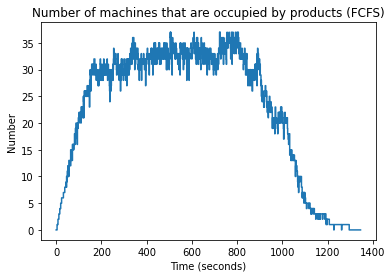

In [78]:
plt.figure()

plt.step(obs_time,obs_M_occupied)
plt.xlabel("Time (seconds)")
plt.ylabel("Number")
plt.title(u'Number of machines that are occupied by products (FCFS)')

Text(0.5, 1.0, 'Percentage of machine occupation (FCFS)')

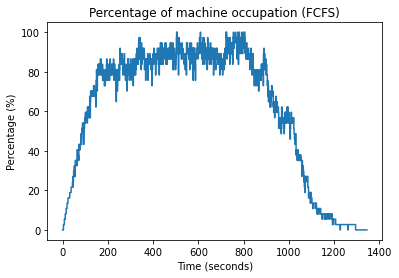

In [79]:
plt.figure()

plt.step(obs_time,occupied_per)
plt.xlabel("Time (seconds)")
plt.ylabel("Percentage (%)")
plt.title(u'Percentage of machine occupation (FCFS)')

Text(0.5, 1.0, 'Machine Occupation (Job shop, matched)')

<Figure size 432x288 with 0 Axes>

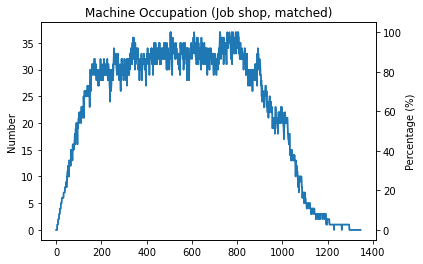

In [80]:
plt.figure()
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 
ax1.plot(obs_time,obs_M_occupied) 
ax2.plot(obs_time,occupied_per) 
ax1.set_ylabel('Number')
ax2.set_ylabel('Percentage (%)')

plt.title(u'Machine Occupation (Job shop, matched)')

In [81]:
total_M_occupied=0
normal_M_occupied=[]
for i in range(len(obs_time)):
    total_M_occupied=total_M_occupied+obs_M_occupied[i]
for i in range(len(obs_time)):
    normal_M_occupied.append(obs_M_occupied[i]/total_M_occupied)

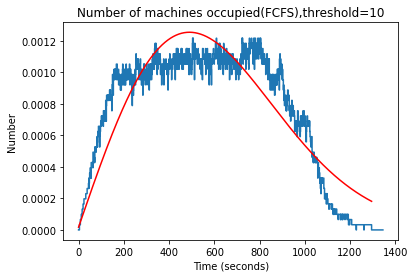

In [82]:
from scipy import optimize
def f_rayleigh(x,  C, sigma):
    return (x/(sigma**2))*np.exp(-(x**2)/(2*sigma**2)) + C

plt.figure()
plt.step(obs_time,normal_M_occupied)
plt.xlabel("Time (seconds)")
plt.ylabel("Number")
plt.title(f'Number of machines occupied(FCFS),threshold={threshold}')
x1 = np.array(obs_time)
y1 = np.array(normal_M_occupied)
C, sigma= optimize.curve_fit(f_rayleigh, x1, y1)[0]
x = np.arange(0, end_time, 1)
y = (x/(sigma**2))*np.exp(-x**2/(2*sigma**2)) + C
plt.plot(x, y, "red")
plt.show()

In [83]:
C, sigma

(1.7159282092248594e-05, 490.1263378156207)

In [84]:
T_less_10=0
T_less_5=0
for i in range(len(obs_time)):
    if (obs_M_occupied[i]<10):
        T_less_10=T_less_10+1
    if (obs_M_occupied[i]<5):
        T_less_5=T_less_5+1

In [85]:
max_N=0
for i in range(len(obs_time)):
    if (obs_M_occupied[i]>max_N):
        max_N=obs_M_occupied[i]

In [86]:
total_N=0
average_N=0
for i in range(end_time):
    total_N=total_N+obs_M_occupied[i]
average_N=total_N/end_time

In [87]:
print(f'the amount of time during which there are less than 10 machines occupied: {T_less_10}')
print(f'the amount of time during which there are less than 10 machines occupied: {T_less_5}')
print(f'end time= {end_time}')
print(f'max_N= {max_N}')
print(f'max_percent= {max_N/N_machine}')
print(f'average_N= {average_N}')
print(f'average_percent= {average_N/N_machine}')

the amount of time during which there are less than 10 machines occupied: 313
the amount of time during which there are less than 10 machines occupied: 247
end time= 1296
max_N= 37
max_percent= 1.0
average_N= 23.46219135802469
average_percent= 0.6341132799466133


Text(0.5, 1.0, 'Number of machines that are vacant (FCFS)')

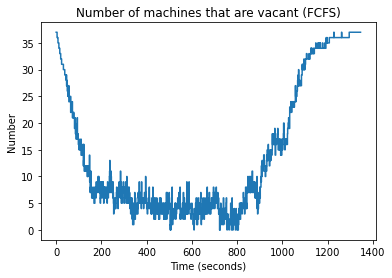

In [88]:
plt.figure()
plt.step(obs_time,obs_M_vacant)
plt.xlabel("Time (seconds)")
plt.ylabel("Number")
plt.title(u'Number of machines that are vacant (FCFS)')

Text(0.5, 1.0, 'Number of of products that are blocked by other products (FCFS)')

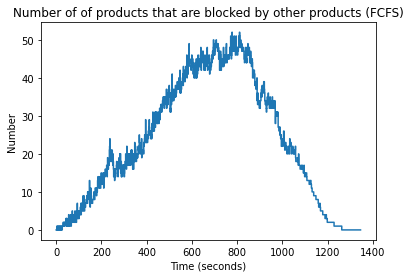

In [89]:
plt.figure()
plt.step(obs_time,obs_block3)
plt.xlabel("Time (seconds)")
plt.ylabel("Number")
plt.title(u'Number of of products that are blocked by other products (FCFS)')

In [90]:
max_B=0
T_B=0
for i in range(len(obs_time)):
    if (obs_block3[i]>max_B):
        max_B=obs_block3[i]
        T_B=i

In [91]:
total_B=0
average_B=0
for i in range(end_time):
    total_B=total_B+obs_block3[i]
average_B=total_B/end_time

In [92]:
print(f'end time= {end_time}')
print(f'max_B= {max_B}')
print(f'max blocking rate= {max_B/S_p[0]}')

print(f'average_N= {average_B}')
print(f'average blocking rate= {average_B/S_p[0]}')
print(f'T_B= {T_B}')
print(f'At % of the process= {T_B/end_time}')

end time= 1296
max_B= 52
max blocking rate= 0.25870646766169153
average_N= 23.96219135802469
average blocking rate= 0.11921488237823229
T_B= 778
At % of the process= 0.6003086419753086
